In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [5]:
df = pd.read_csv('wiki_machine_learning.csv', sep = ' ')

In [7]:
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [9]:
df['date'].min(), df['date'].max()

('2015-01-01', '2016-01-20')

In [11]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [13]:
cols = ['lang', 'page', 'rank', 'month', 'title']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('date')

In [15]:
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [17]:
df = df.rename(columns={'date': 'ds', 'count': 'y'})

In [19]:
df = df.groupby('ds')['y'].sum().reset_index()

In [21]:
df

,ds,y
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
379,2016-01-16,1644
380,2016-01-17,1836
381,2016-01-18,2983
382,2016-01-19,3389


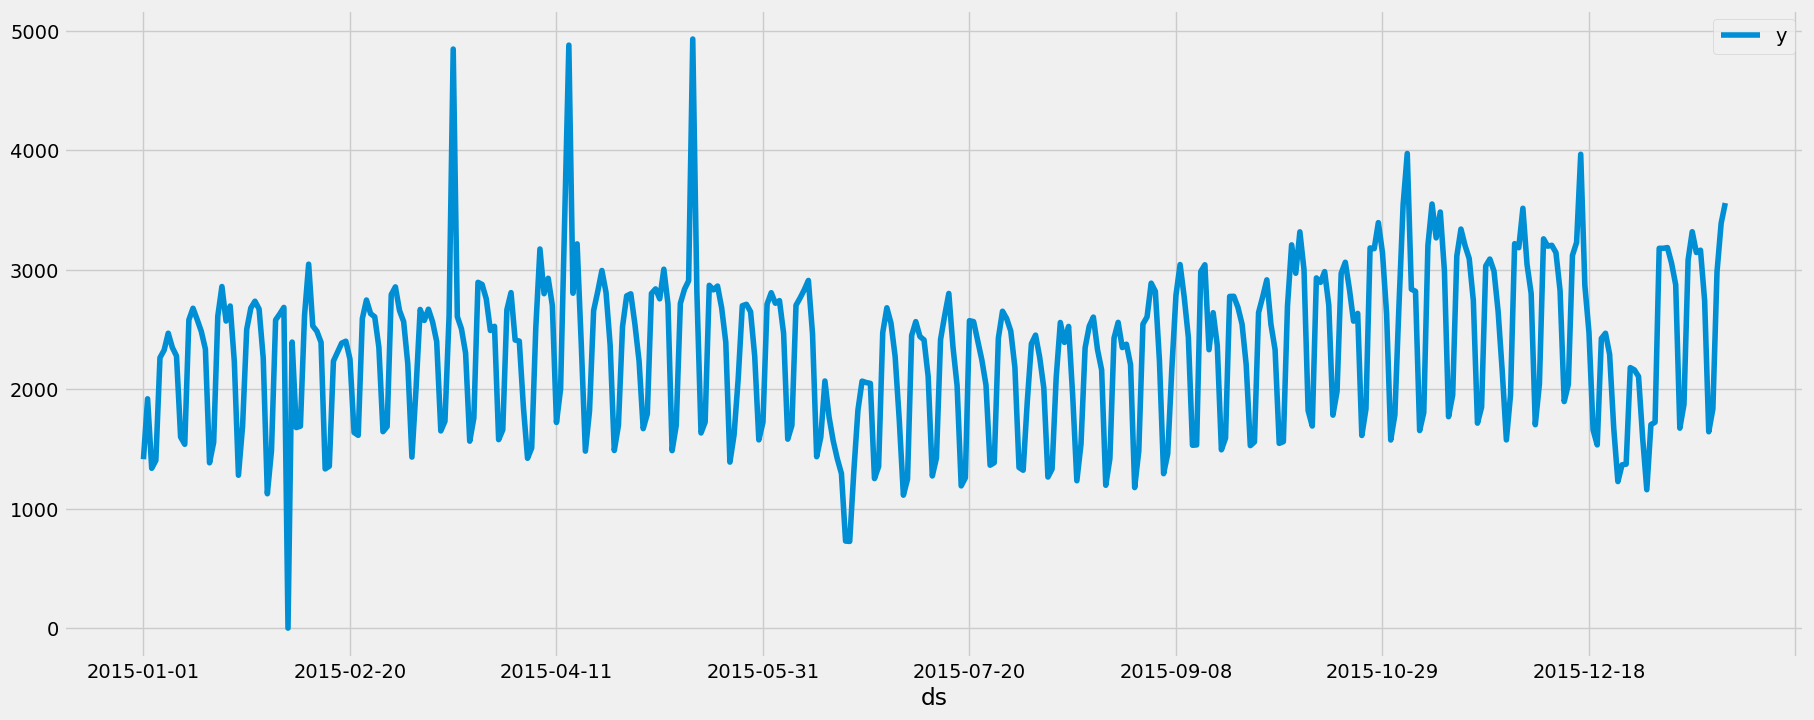

In [23]:
df.plot(x='ds',y='y', figsize=(20, 8))
plt.show()

## Facebook Prophet

In [39]:
wiki_model = Prophet(interval_width=0.95)
wiki_model.fit(df)

00:42:54 - cmdstanpy - INFO - Chain [1] start processing
00:42:55 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
wiki_forecast2 = wiki_model.make_future_dataframe(periods=30, freq='D',include_history= False)
wiki_forecast2

,ds
0,2016-01-21
1,2016-01-22
2,2016-01-23
3,2016-01-24
4,2016-01-25
5,2016-01-26
6,2016-01-27
7,2016-01-28
8,2016-01-29
9,2016-01-30


In [43]:
wiki_forecast2 = wiki_model.predict(wiki_forecast2)

In [45]:
wiki_forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-21,2651.439611,2168.435543,3677.615111,2651.338995,2651.487738,266.861149,266.861149,266.861149,266.861149,266.861149,266.861149,0.0,0.0,0.0,2918.300761
1,2016-01-22,2653.779721,1920.734478,3382.349875,2653.360303,2654.116581,-9.091115,-9.091115,-9.091115,-9.091115,-9.091115,-9.091115,0.0,0.0,0.0,2644.688606
2,2016-01-23,2656.119831,1025.766741,2497.234293,2655.239345,2656.856208,-843.541167,-843.541167,-843.541167,-843.541167,-843.541167,-843.541167,0.0,0.0,0.0,1812.578664
3,2016-01-24,2658.459940,1214.987293,2664.593077,2656.972843,2659.805976,-704.671779,-704.671779,-704.671779,-704.671779,-704.671779,-704.671779,0.0,0.0,0.0,1953.788162
4,2016-01-25,2660.800050,2201.110789,3699.125618,2658.712945,2662.764280,308.512131,308.512131,308.512131,308.512131,308.512131,308.512131,0.0,0.0,0.0,2969.312181
5,2016-01-26,2663.140160,2466.795477,3982.998344,2660.320515,2665.794916,545.515957,545.515957,545.515957,545.515957,545.515957,545.515957,0.0,0.0,0.0,3208.656117
6,2016-01-27,2665.480269,2369.548412,3829.860022,2661.837056,2668.966090,436.414822,436.414822,436.414822,436.414822,436.414822,436.414822,0.0,0.0,0.0,3101.895092
7,2016-01-28,2667.820379,2199.286223,3637.107318,2663.315857,2672.071829,266.861149,266.861149,266.861149,266.861149,266.861149,266.861149,0.0,0.0,0.0,2934.681528
8,2016-01-29,2670.160489,1884.345447,3440.715750,2664.510846,2675.307720,-9.091115,-9.091115,-9.091115,-9.091115,-9.091115,-9.091115,0.0,0.0,0.0,2661.069374
9,2016-01-30,2672.500599,1094.408730,2598.718133,2666.041854,2678.441114,-843.541167,-843.541167,-843.541167,-843.541167,-843.541167,-843.541167,0.0,0.0,0.0,1828.959432


In [49]:
forecast_start_date = '2016-01-21'
wiki_forecast_filtered = wiki_forecast2[wiki_forecast2['ds'] >= forecast_start_date]

<Figure size 1800x600 with 0 Axes>

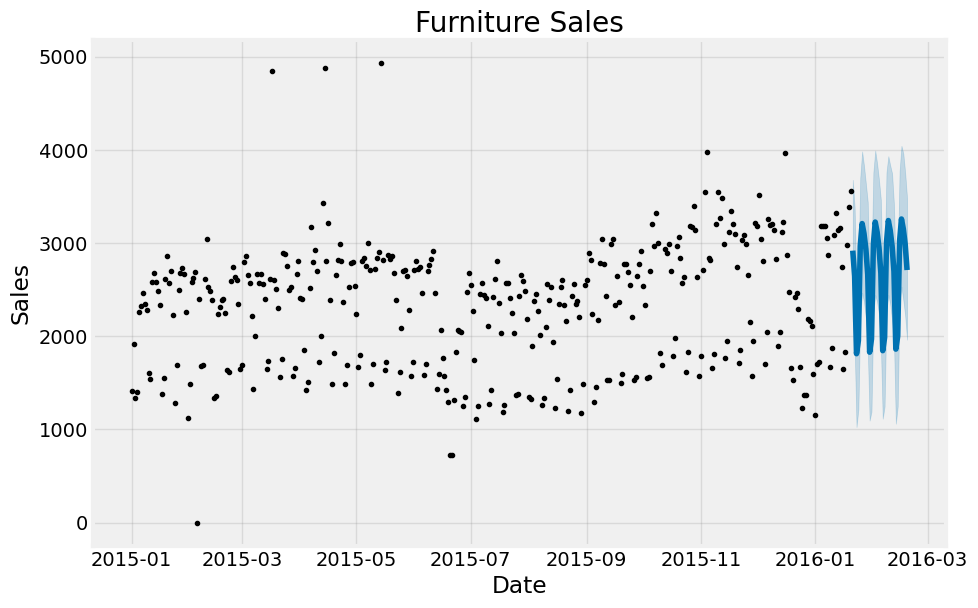

In [51]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
wiki_model.plot(wiki_forecast_filtered, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

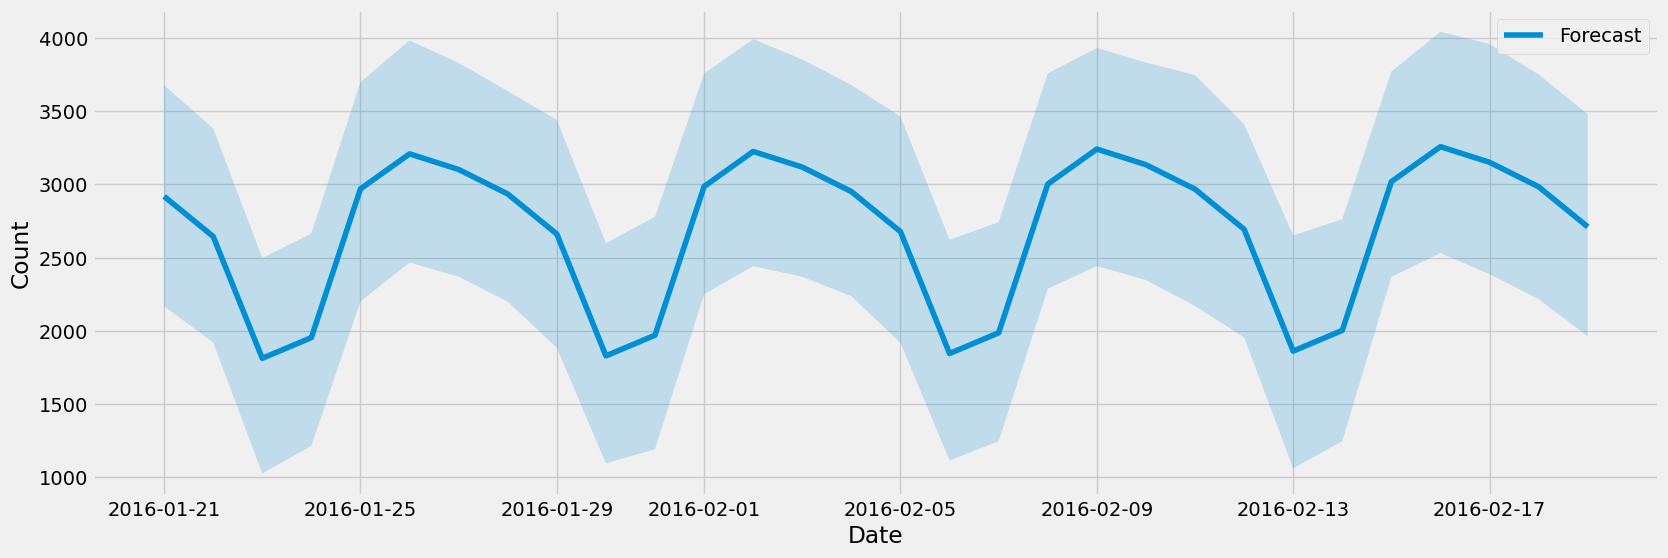

In [53]:
plt.figure(figsize=(18, 6))
plt.plot(wiki_forecast_filtered['ds'], wiki_forecast_filtered['yhat'], label='Forecast')
plt.fill_between(wiki_forecast_filtered['ds'], wiki_forecast_filtered['yhat_lower'], wiki_forecast_filtered['yhat_upper'], alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

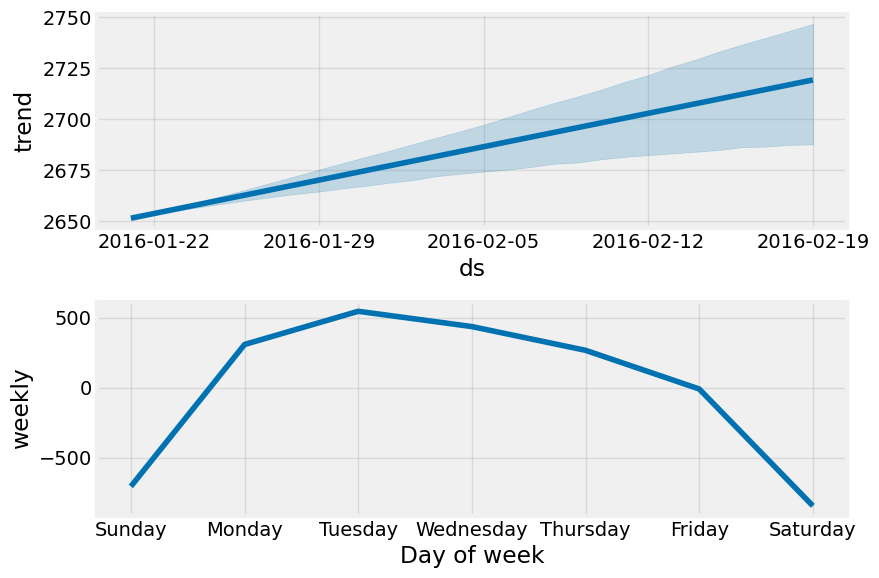

In [55]:
wiki_model.plot_components(wiki_forecast2);

In [186]:
from neuralprophet import NeuralProphet

## NeuralProphet

In [160]:
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [162]:
metrics = model.fit(df, freq="D") 
future = model.make_future_dataframe(df, periods=30, n_historic_predictions=len(df)) 

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (24) is too small than the required number                     for the learning rate finder (217). The results might not be optimal.


Finding best initial lr:   0%|          | 0/217 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [164]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.517% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.517% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Dropped 30 rows at the end with NaNs in 'y' column.


Predicting: 24it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [170]:
forecast = forecast.set_index('ds')

In [172]:
forecast = forecast['2016-01-19':]

In [180]:
forecast = forecast.reset_index().sort_values('ds',ascending=True)

In [190]:
import plotly_resampler

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


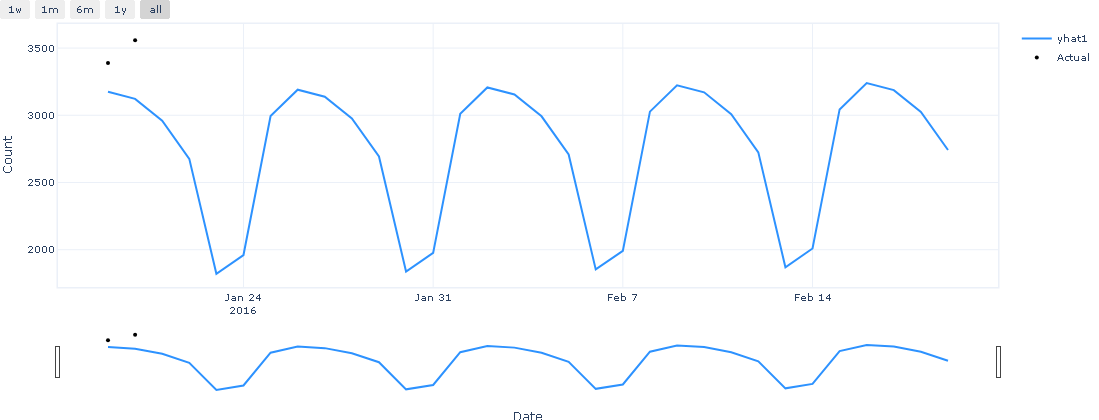

<Figure size 1800x600 with 0 Axes>

In [184]:
#plotting Count forecast
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Count')

ERROR - (NP.plotly.plot_parameters) - plotly-resampler is not installed. Please install it to use the resampler.


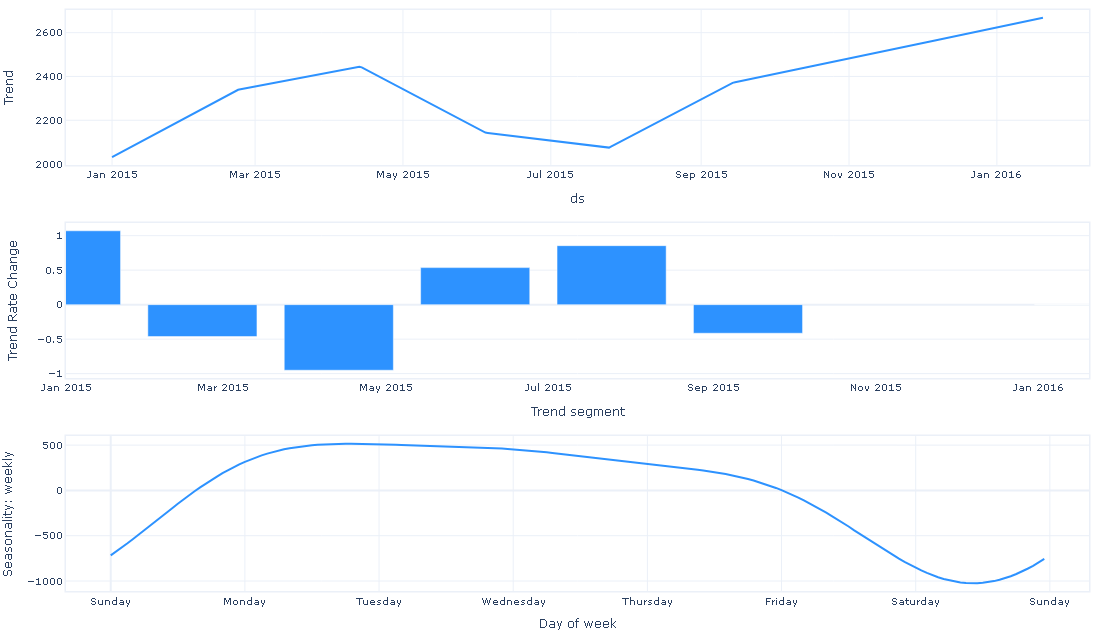

In [192]:
model.plot_parameters()